Alunos(as)/RAs:<br>
Bruna Mezzari Carlos -	235624<br>
Jean Antonio Ribeiro -	265739<br>
Kellen Natalice Vilharva -	235493<br>
Roberto Junio de Almeida Candian -	214572<br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import os
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn import linear_model
#from google.colab import drive

#drive.mount('/content/drive')

# Leitura dos dados e Funções

In [ ]:
#!git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology

DATA_DIR = './E1--Vaccine-immunology/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/JeanKusanagi/E1--Vaccine-immunology')
    print('Done!')

Loading data...
Done!


In [ ]:
DATA_OUTPUT = 'output'

if not os.path.exists(DATA_OUTPUT):
    os.mkdir(DATA_OUTPUT)

In [ ]:
df = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv")

#df = df.rename(columns={'Hepatite B  em crianças até 30 dias': 'Hepatite B30'})
#df = df.rename(columns={'Pneumocócica(1° ref)': 'Pneumocócica1'})
#df = df.rename(columns={'Meningococo C (1° ref)': 'Meningococo1'})
#df = df.rename(columns={'Poliomielite(1° ref)': 'Poliomielite1'})
df.head()

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
0,1994,88.31,0.0,0.0,0.0,8.85,0.0,0.0,58.24,0.0,5.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.76,0.0,0.0,71.37,0.00,0.0,0.0,0.0,4.69,38.27
1,1995,103.63,0.0,0.0,0.0,10.50,0.0,0.0,77.83,0.0,4.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.54,0.0,0.0,86.86,0.00,0.0,0.0,0.0,23.61,45.71
2,1996,104.21,0.0,0.0,0.0,16.50,0.0,0.0,80.86,0.0,5.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.25,0.0,0.0,80.40,0.01,0.0,0.0,0.0,42.10,50.01
3,1997,117.12,0.0,0.0,0.0,5.79,0.0,0.0,89.27,0.0,7.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.50,0.0,0.0,108.61,0.03,0.0,0.0,0.0,106.68,68.95
4,1998,111.61,0.0,0.0,0.0,12.63,0.0,0.0,95.30,0.0,18.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.97,0.0,0.0,95.26,0.84,0.0,0.0,0.0,104.36,70.65


Remove a última linha do DataSet, pois a coluna Ano contém um valor string igual a 'Total'.

In [ ]:
def NovoDataSet(df):
  new_df = df.copy()

  it=0
  for i, row in new_df.iterrows():
    if row['Ano'] == 'Total':
      #print('Achou')
      it=i
  print('Iterador: ', it)
  new_df  =new_df.drop(it)
  
  return new_df

In [ ]:
from numpy.random import rand

def fill_dummy_values(df, scaling_factor):
  # Create copy of dataframe 
  df_dummy = df.copy(deep=True)
  
  # Iterate over each column
  for col in df_dummy:
    # Get column, column missing values and range   
    col = df_dummy[col]
    col = pd.to_numeric(col)
    #col = pd.to_numeric(col, errors='ignore')
    col_null = col.isnull()       
    num_nulls = col_null.sum()   
    col_range = col.max() - col.min()
    
    # Shift and scale dummy values   
    dummy_values = (rand(num_nulls) - 2)    
    dummy_values = dummy_values * scaling_factor * col_range + col.min()
    
    # Return dummy values   
    col[col_null] = dummy_values

  return df_dummy

#fill_dummy_values(new_df,0.3)

Cria um DataSet com os valores de um conjunto de DataSet, baseado em um determinado Ano.

In [ ]:
def BuscaDadosPorAno(ano, bases):
  Local = []
  BCG = []
  HepatiteB30 = []
  RotavirusHumano = []
  MeningococoC = []
  HepatiteB = []
  Penta = []
  Pneumococica = []
  Poliomielite = []
  Poliomielite4 = []
  FebreAmarela = []
  HepatiteA = []
  Pneumococica1 = []
  MeningococoC1 = []
  Poliomielite1  = []	
  TripliceViralD1 = []
  TripliceViralD2 = []
  TetraViral = []
  DTP = []
  DTP_REF = []
  TripliceBacteriana = []
  Sarampo = []
  Haemophilus = []
  Dupla = []
  dTpaGestante = []
  Tetravalente = []
  Ignorado = []
  Total = []

  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  for i in bases:
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    for index, row in base.iterrows():
      if row['Ano'] == ano:
        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        Local.append(i)
        BCG.append(row['BCG'])
        HepatiteB30.append(row['Hepatite B em crianças até 30 dias'])
        RotavirusHumano.append(row['Rotavírus Humano'])
        MeningococoC.append(row['Meningococo C'])
        HepatiteB.append(row['Hepatite B'])
        Penta.append(row['Penta'])
        Pneumococica.append(row['Pneumocócica'])
        Poliomielite.append(row['Poliomielite'])
        Poliomielite4.append(row['Poliomielite 4 anos'])
        FebreAmarela.append(row['Febre Amarela'])
        HepatiteA.append(row['Hepatite A'])
        Pneumococica1.append(row['Pneumocócica(1° ref)'])
        MeningococoC1.append(row['Meningococo C (1° ref)'])
        Poliomielite1.append(row['Poliomielite(1° ref)'])	
        TripliceViralD1.append(row['Tríplice Viral  D1'])
        TripliceViralD2.append(row['Tríplice Viral  D2'])
        TetraViral.append(row['Tetra Viral(SRC+VZ)'])
        DTP.append(row['DTP'])
        DTP_REF.append(row['DTP REF (4 e 6 anos)'])
        TripliceBacteriana.append(row['Tríplice Bacteriana(DTP)(1° ref)'])
        Sarampo.append(row['Sarampo'])
        Haemophilus.append(row['Haemophilus influenzae b'])
        Dupla.append(row['Dupla adulto e tríplice acelular gestante'])
        dTpaGestante.append(row['dTpa gestante'])
        Tetravalente.append(row['Tetravalente (DTP/Hib) (TETRA)'])
        Ignorado.append(row['Ignorado'])
        Total.append(row[' Total'])

  new_tb = pd.DataFrame()

  new_tb['Local'] = Local
  new_tb['BCG'] = BCG
  new_tb['Hepatite B em crianças até 30 dias'] = HepatiteB30
  new_tb['Rotavírus Humano'] = RotavirusHumano
  new_tb['Meningococo C'] = MeningococoC
  new_tb['Hepatite B'] = HepatiteB
  new_tb['Penta'] = Penta
  new_tb['Pneumocócica'] = Pneumococica
  new_tb['Poliomielite'] = Poliomielite
  new_tb['Poliomielite 4 anos'] = Poliomielite4
  new_tb['Febre Amarela'] = FebreAmarela
  new_tb['Hepatite A'] = HepatiteA
  new_tb['Poliomielite(1° ref)'] = Pneumococica1
  new_tb['Meningococo C (1° ref)'] = MeningococoC1
  new_tb['Poliomielite(1° ref)'] = Poliomielite1
  new_tb['Tríplice Viral D1'] = TripliceViralD1
  new_tb['Tríplice Viral D2'] = TripliceViralD2
  new_tb['Tetra Viral(SRC+VZ)'] = TetraViral
  new_tb['DTP'] = DTP
  new_tb['DTP REF (4 e 6 anos)'] = DTP_REF
  new_tb['Tríplice Bacteriana(DTP)(1° ref)'] = TripliceBacteriana
  new_tb['Sarampo'] = Sarampo
  new_tb['Haemophilus influenzae b'] = Haemophilus
  new_tb['Dupla adulto e tríplice acelular gestante'] = Dupla
  new_tb['dTpa gestante'] = dTpaGestante
  new_tb['Tetravalente (DTP/Hib) (TETRA)'] = Tetravalente
  new_tb['Ignorado'] = Ignorado
  new_tb['Total'] = Total

  return new_tb

Busca dados de uma determinada doença em um conjunto de base de dados para todos os anos.

In [ ]:
def BuscaDadosPorDoenca(ano, doenca, bases):
  s = '/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/'
  r=s+bases[0]
  db = pd.read_csv(r)
  variacao_anos = db['Ano']
  #variacao_anos = [2020]
  #print(variacao_anos)

  new_tb = pd.DataFrame()
  #regioes = []
  #v = []

  new_tb['Ano'] = db['Ano']

  for i in bases:
    #regioes.append(i)
    r=s+i
    #print(r)
    base = pd.read_csv(r)
    new_tb[i] = base[doenca]
    #for index, row in base.iterrows():
      #print(row['Ano'])
      #new_tb[doenca] = row[doenca]
      #for a in variacao_anos:
        #print(a)
        #v.append(row[doenca])
        #print(row[doenca])
        #new_tb[a] = row[doenca]
        #if row[doenca] == ano:
        #  pass
        #  new_tb[doenca] = row[doenca]

        #print(row['Ano'], row['BCG'])
        #print(row['Total'])
        #Local.append(i)
        #BCG.append(row['BCG'])
      #new_tb[a] = v
      #v=[]

    #new_tb['Anos'] = v
    #new_tb['Regiões'] = regioes

  return new_tb

bases_sudeste = [
        'ano_imuno_sudeste.csv',
        'ano_imuno_sudeste_capitais.csv',
        'ano_imuno_sudeste_extrprobeza=n.csv',
        'ano_imuno_sudeste_extrprobeza=s.csv'
]

bases_sul = [
        'ano_imuno_sul.csv',
        'ano_imuno_sul_capitais.csv',
        'ano_imuno_sul_extrprobeza=n.csv',
        'ano_imuno_sul_extrprobeza=s.csv'
]

bases_centrooeste = [
        'ano_imuno_centrooeste.csv',
        'ano_imuno_centrooeste_capitais.csv',
        'ano_imuno_centrooeste_extrprobeza=n.csv',
        'ano_imuno_centrooeste_extrprobeza=s.csv'
]

bases_norte = [
        'ano_imuno_norte.csv',
        'ano_imuno_norte_capitais.csv',
        'ano_imuno_norte_extrprobeza=n.csv',
        'ano_imuno_norte_extrprobeza=s.csv'
]

bases_nordeste = [
        'ano_imuno_nordeste.csv',
        'ano_imuno_nordeste_capitais.csv',
        'ano_imuno_nordeste_extrprobeza=n.csv',
        'ano_imuno_nordeste_extrprobeza=s.csv'
]


r = BuscaDadosPorDoenca(2020,'BCG',bases_sudeste)
r = r.rename(columns={'ano_imuno_sudeste.csv': 'Sudeste'})
r = r.rename(columns={'ano_imuno_sudeste_capitais.csv': 'Sudeste Capitais'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=n.csv': 'Sudeste Extrema Probeza n'})
r = r.rename(columns={'ano_imuno_sudeste_extrprobeza=s.csv': 'Sudeste Extrema Probeza s'})

In [ ]:
# Cria datasets para cada imunizante, contendo ano e região do Brasil
am_legal = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_amazlegal=s.csv')
semiarido = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_semiarido=s.csv')
zdefronteira = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_zdefronteira=s.csv')
capitais = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_capitais.csv')
extrpobreza = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_extrprobeza=s.csv')
extrpobreza_n = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br_extrprobeza=n.csv')
br = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_imuno_br.csv')
br = NovoDataSet(br)
d = {'1 Região Norte': 'Norte', '2 Região Nordeste': 'Nordeste', '3 Região Sudeste':'Sudeste',
       '4 Região Sul': 'Sul', '5 Região Centro-Oeste': 'Centro-Oeste'}

bcg = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_bcg.csv')
bcg = bcg.drop(' Total',axis=1)
bcg = NovoDataSet(bcg)
bcg['Ano'] = bcg['Ano'].astype(float)
bcg = bcg[bcg['Ano'] != 2021]
bcg['Am legal'] = am_legal['BCG']
bcg['Semiarido'] = semiarido['BCG']
bcg['Z de Fronteira'] = zdefronteira['BCG']
bcg['Extr Pobreza'] = extrpobreza['BCG']
#bcg['S Extr Pobreza'] = extrpobreza_n['BCG']
bcg['Capitais'] = capitais['BCG']
bcg['Brasil'] = br['BCG']
bcg = bcg.rename(columns=d)

polio = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_polio.csv')
polio = polio.drop(' Total',axis=1)
polio = NovoDataSet(polio)
polio['Ano'] = polio['Ano'].astype(float)
polio = polio[polio['Ano'] != 2021]
polio['Am legal'] = am_legal['Poliomielite']
polio['Semiarido'] = semiarido['Poliomielite']
polio['Z de Fronteira'] = zdefronteira['Poliomielite']
polio['Extr Pobreza'] = extrpobreza['Poliomielite']
#polio['S Extr Pobreza'] = extrpobreza_n['Poliomielite']
polio['Capitais'] = capitais['Poliomielite']
polio['Brasil'] = br['Poliomielite']
polio = polio.rename(columns=d)

hepb = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_hepB.csv')
hepb = hepb.drop(' Total',axis=1)
hepb = NovoDataSet(hepb)
hepb['Ano'] = hepb['Ano'].astype(float)
hepb = hepb[hepb['Ano'] != 2021]
hepb['Am legal'] = am_legal['Hepatite B']
hepb['Semiarido'] = semiarido['Hepatite B']
hepb['Z de Fronteira'] = zdefronteira['Hepatite B']
hepb['Extr Pobreza'] = extrpobreza['Hepatite B']
#hepb['S Extr Pobreza'] = extrpobreza_n['Hepatite B']
hepb['Capitais'] = capitais['Hepatite B']
hepb['Brasil'] = br['Hepatite B']
hepb=hepb.rename(columns=d)

dtp = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_região_dtp.csv')
dtp = dtp.drop(' Total',axis=1)
dtp = NovoDataSet(dtp)
dtp['Ano'] = dtp['Ano'].astype(float)
dtp = dtp[dtp['Ano'] != 2021]
dtp['Am legal'] = am_legal['DTP']
dtp['Semiarido'] = semiarido['DTP']
dtp['Z de Fronteira'] = zdefronteira['DTP']
dtp['Extr Pobreza'] = extrpobreza['DTP']
#dtp['S Extr Pobreza'] = extrpobreza_n['DTP']
dtp['Capitais'] = capitais['DTP']
dtp['Brasil'] = br['DTP']
dtp=dtp.rename(columns=d)

famarela = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/ano_regiao_febreamarela.csv')
famarela = famarela.drop(' Total',axis=1)
famarela = NovoDataSet(famarela)
famarela['Ano'] = famarela['Ano'].astype(float)
famarela = famarela[famarela['Ano'] != 2021]
famarela['Am legal'] = am_legal['Febre Amarela']
famarela['Semiarido'] = semiarido['Febre Amarela']
famarela['Z de Fronteira'] = zdefronteira['Febre Amarela']
famarela['Extr Pobreza'] = extrpobreza['Febre Amarela']
#famarela['S Extr Pobreza'] = extrpobreza_n['Febre Amarela']
famarela['Capitais'] = capitais['Febre Amarela']
famarela['Brasil'] = br['Febre Amarela']
famarela = famarela.rename(columns=d)

bcg.head()


Iterador:  28
Iterador:  27
Iterador:  27
Iterador:  27
Iterador:  23
Iterador:  27


,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
0,1994.0,74.03,94.40,94.31,112.64,64.92,73.62,95.06,72.80,88.56,100.91,88.31
1,1995.0,102.35,102.40,112.61,96.43,86.15,103.09,101.56,102.63,97.30,109.99,103.63
2,1996.0,107.61,101.02,107.16,100.73,109.52,105.51,94.49,101.54,90.32,122.09,104.21
3,1997.0,114.40,115.79,120.77,110.19,120.80,118.12,110.16,110.22,104.66,142.19,117.12
4,1998.0,99.02,110.03,117.59,104.64,117.64,106.16,99.06,110.12,94.65,136.39,111.61


In [ ]:
famarela.describe()

,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2007.000000,79.082222,34.397778,28.094074,29.918889,72.743704,80.216296,30.203333,67.369259,40.122593,31.893333,39.201111
std,7.937254,25.776397,15.286141,18.802888,28.147103,26.666159,26.201026,15.488801,22.222665,18.048774,12.984815,16.712671
min,1994.000000,6.050000,1.580000,0.000000,0.010000,3.500000,10.340000,0.000000,3.650000,1.370000,1.610000,4.810000
25%,2000.500000,69.090000,33.355000,19.990000,0.955000,68.025000,70.875000,33.145000,56.745000,40.800000,30.310000,35.910000
50%,2007.000000,91.680000,42.130000,31.120000,34.090000,81.990000,89.630000,37.110000,75.030000,46.970000,32.570000,46.170000
75%,2013.500000,95.320000,44.175000,33.090000,56.640000,86.230000,97.930000,39.370000,82.525000,51.430000,36.785000,49.240000
max,2020.000000,105.010000,48.820000,71.960000,76.560000,102.350000,106.930000,43.870000,94.110000,56.950000,60.860000,62.410000


In [ ]:
#Cria datasets com a média de imunização de cada continente por ano

df1 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_bcg_editado.csv')
df2 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_polio_editado.csv')
df3 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_hepB_editado.csv')
df4 = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/pais_ano_dtp3_editado.csv')
column_names = ["Ano","Americas", "Europe", "Africa"]

bcg_mundo = pd.DataFrame(columns = column_names)
bcg_mundo[['Ano', 'Americas']] = df1[df1['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df1['Period'],axis=0).mean()
bcg_mundo['Europe'] = df1[df1['ParentLocation'] == 'Europe']['Value'].groupby(df1['Period'],axis=0).mean()
bcg_mundo['Africa'] = df1[df1['ParentLocation'] == 'Africa']['Value'].groupby(df1['Period'],axis=0).mean()
bcg_mundo = bcg_mundo[bcg_mundo['Ano'] >= 1994]

polio_mundo = pd.DataFrame(columns = column_names)
polio_mundo[['Ano', 'Americas']] = df2[df2['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df2['Period'],axis=0).mean()
polio_mundo['Europe'] = df2[df2['ParentLocation'] == 'Europe']['Value'].groupby(df2['Period'],axis=0).mean()
polio_mundo['Africa'] = df2[df2['ParentLocation'] == 'Africa']['Value'].groupby(df2['Period'],axis=0).mean()
polio_mundo = polio_mundo[polio_mundo['Ano'] >= 1994]

hepb_mundo = pd.DataFrame(columns = column_names)
hepb_mundo[['Ano', 'Americas']] = df3[df3['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df3['Period'],axis=0).mean()
hepb_mundo['Europe'] = df3[df3['ParentLocation'] == 'Europe']['Value'].groupby(df3['Period'],axis=0).mean()
hepb_mundo['Africa'] = df3[df3['ParentLocation'] == 'Africa']['Value'].groupby(df3['Period'],axis=0).mean()
hepb_mundo = hepb_mundo[hepb_mundo['Ano'] >= 1994]

dtp_mundo = pd.DataFrame(columns = column_names)
dtp_mundo[['Ano', 'Americas']] = df4[df4['ParentLocation'] == 'Americas'][['Period','Value']].groupby(df4['Period'],axis=0).mean()
dtp_mundo['Europe'] = df4[df4['ParentLocation'] == 'Europe']['Value'].groupby(df4['Period'],axis=0).mean()
dtp_mundo['Africa'] = df4[df4['ParentLocation'] == 'Africa']['Value'].groupby(df4['Period'],axis=0).mean()
dtp_mundo = dtp_mundo[dtp_mundo['Ano'] >= 1994]

dtp_mundo.head()

,Ano,Americas,Europe,Africa
Period,,,,
1994,1994.0,85.114286,89.254902,63.886364
1995,1995.0,86.142857,91.215686,65.750000
1996,1996.0,84.485714,91.882353,64.068182
1997,1997.0,86.285714,92.711538,62.659091
1998,1998.0,86.314286,92.865385,63.340909


In [ ]:
bcg_mundo.describe()

,Ano,Americas,Europe,Africa
count,26.000000,26.000000,26.000000,26.000000
mean,2006.500000,94.145299,91.766021,84.600332
std,7.648529,1.079751,1.498276,3.912919
min,1994.000000,90.703704,87.138889,77.977273
25%,2000.250000,93.703704,91.189916,80.576087
50%,2006.500000,94.351852,92.258065,86.839038
75%,2012.750000,94.861111,92.774510,87.724561
max,2019.000000,95.481481,93.827586,89.361702


In [ ]:
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
polio_mundo_br = polio_mundo_br.rename(columns=d)
bcg_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/bcg_mundo_br.csv")
bcg_mundo_br = bcg_mundo_br.rename(columns=d)
dtp_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/dtp_mundo_br.csv")
dtp_mundo_br = dtp_mundo_br.rename(columns=d)
hepb_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/hepb_mundo_br.csv")
hepb_mundo_br = hepb_mundo_br.rename(columns=d)
hepb_mundo_br.head()

,Period,Ano,Americas,Europe,Africa,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
0,1994,1994.0,48.000000,63.333333,57.000000,16.32,0.01,90.42,38.45,0.00,9.64,0.00,24.85,3.08,7.24,8.85
1,1995,1995.0,62.000000,58.363636,65.000000,39.16,0.00,5.36,30.66,0.31,24.26,0.00,29.93,4.41,9.95,10.50
2,1996,1996.0,72.750000,76.000000,66.600000,47.33,0.04,5.39,53.60,19.48,30.03,0.01,41.36,7.63,19.51,16.50
3,1997,1997.0,69.800000,75875.000000,72.428571,12.82,0.14,1.62,24.27,6.90,8.61,0.03,19.30,3.46,6.66,5.79
4,1998,1998.0,74.285714,74.050000,76.000000,28.07,4.27,6.60,33.72,18.75,20.08,2.63,31.74,6.73,17.44,12.63


In [ ]:
brasil_indices = pd.read_csv('/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/brasil_indices.csv')
brasil_indices.head()

,Ano,ed_ind,health_expenditure,mortality_children_under_1_year_per_1000,idh,obitos_infantis,exp_vida_anos,bcg,dtp,hepb,polio,febreamarela,nascidos_vivos
0,1994,511,NaN,NaN,642,87304,67.9,88.31,64.76,8.85,58.24,5.27,2571571
1,1995,523,NaN,47.9,651,81572,68.3,103.63,80.54,10.50,77.83,4.81,2824729
2,1996,535,NaN,NaN,658,75024,68.7,104.21,78.25,16.50,80.86,5.65,2945425
3,1997,547,NaN,NaN,665,71400,69.1,117.12,78.50,5.79,89.27,7.84,3026658
4,1998,559,NaN,NaN,670,71690,69.4,111.61,92.97,12.63,95.30,18.49,3148037


In [ ]:
brasil_indices['Mortalidade'] = brasil_indices['obitos_infantis']/brasil_indices['nascidos_vivos']
brasil_indices['Média'] = (brasil_indices['polio']+brasil_indices['bcg']+brasil_indices['dtp']+brasil_indices['hepb'])/4.0
brasil_indices['Média'][brasil_indices['Ano'] >= 2018] = (brasil_indices['polio'][brasil_indices['Ano'] >= 2018]+brasil_indices['bcg'][brasil_indices['Ano'] >= 2018]+brasil_indices['hepb'][brasil_indices['Ano'] >= 2018])/3.0
brasil_indices['Média'][brasil_indices['Ano'] == 2003] = (brasil_indices['polio'][brasil_indices['Ano'] == 2003]+brasil_indices['bcg'][brasil_indices['Ano'] == 2003]+brasil_indices['hepb'][brasil_indices['Ano'] >= 2003])/3.0
brasil_indices.head(27)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Ano,ed_ind,health_expenditure,mortality_children_under_1_year_per_1000,idh,obitos_infantis,exp_vida_anos,bcg,dtp,hepb,polio,febreamarela,nascidos_vivos,Mortalidade,Média
0,1994,511,NaN,NaN,642,87304,67.9,88.31,64.76,8.85,58.24,5.27,2571571,0.033950,55.040000
1,1995,523,NaN,47.9,651,81572,68.3,103.63,80.54,10.50,77.83,4.81,2824729,0.028878,68.125000
2,1996,535,NaN,NaN,658,75024,68.7,104.21,78.25,16.50,80.86,5.65,2945425,0.025471,69.955000
3,1997,547,NaN,NaN,665,71400,69.1,117.12,78.50,5.79,89.27,7.84,3026658,0.023590,72.670000
4,1998,559,NaN,NaN,670,71690,69.4,111.61,92.97,12.63,95.30,18.49,3148037,0.022773,78.127500
5,1999,572,NaN,NaN,676,69345,69.8,117.28,94.46,83.50,99.08,29.06,3256433,0.021295,98.580000
6,2000,584,8.3,34.8,685,68199,70.1,111.74,94.71,91.08,101.44,37.14,3206761,0.021267,99.742500
7,2001,597,NaN,NaN,691,61943,70.5,112.60,97.45,91.88,102.83,40.24,3115474,0.019882,101.190000
8,2002,610,NaN,NaN,699,58916,70.8,110.28,44.69,91.47,100.01,38.70,3059402,0.019257,86.612500
9,2003,594,NaN,NaN,695,57540,71.2,108.47,1.41,92.00,100.48,34.68,3038251,0.018939,100.316667


# Gráficos de Correlação e Boxplot

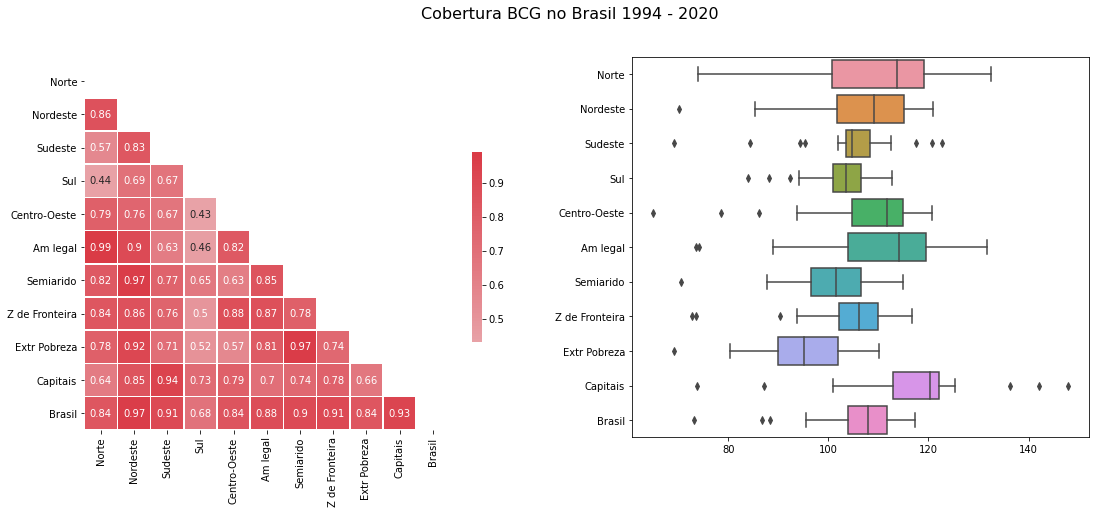

In [ ]:
# Generate a mask for the upper triangle
df = bcg 
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura BCG no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura BCG no Brasil 1994 - 2020.png', format='png')

In [ ]:
bcg.describe()

,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,S Extr Pobreza,Capitais,Brasil
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2007.000000,109.172222,107.023704,104.535556,101.995926,107.274815,110.528148,101.037778,103.591852,95.597407,105.481111,117.591111,105.481111
std,7.937254,14.854867,11.584453,10.372113,6.572378,13.034029,15.356486,9.575834,10.893243,9.545842,9.986927,14.693780,9.986927
min,1994.000000,74.030000,70.190000,69.110000,83.880000,64.920000,73.620000,70.570000,72.800000,69.170000,73.100000,73.810000,73.100000
25%,2000.500000,100.685000,101.710000,103.615000,100.875000,104.785000,103.910000,96.485000,102.085000,89.980000,103.920000,112.930000,103.920000
50%,2007.000000,113.640000,109.150000,104.820000,103.510000,111.740000,114.100000,101.560000,106.180000,95.050000,107.940000,120.360000,107.940000
75%,2013.500000,119.080000,115.035000,108.350000,106.440000,114.885000,119.600000,106.540000,109.940000,101.945000,111.675000,122.155000,111.675000
max,2020.000000,132.450000,120.850000,122.740000,112.640000,120.800000,131.680000,114.890000,116.730000,110.070000,117.280000,147.860000,117.280000


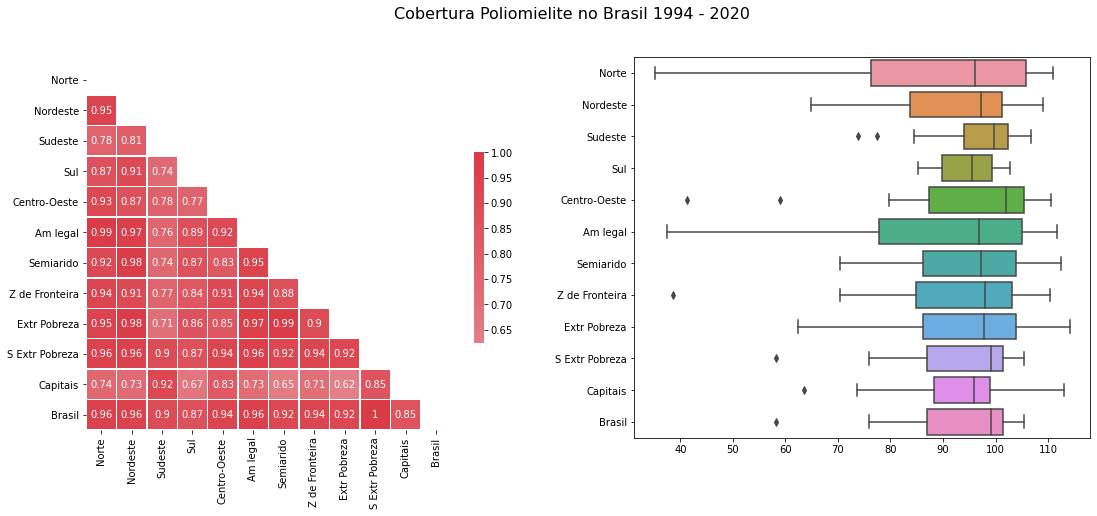

In [ ]:
# Generate a mask for the upper triangle
df = polio
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano',axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil 1994 - 2020.png', format='png')

In [ ]:
polio.describe()

,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,S Extr Pobreza,Capitais,Brasil
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2007.000000,88.790000,93.182222,96.693333,94.928519,95.448519,89.539259,95.134074,91.780370,94.911852,94.111111,93.132593,94.111111
std,7.937254,19.791496,12.765964,8.249867,5.622547,16.053908,19.968881,11.427268,15.720821,13.598462,11.394742,10.377855,11.394742
min,1994.000000,35.070000,64.930000,73.720000,85.230000,41.330000,37.450000,70.300000,38.580000,62.330000,58.240000,63.520000,58.240000
25%,2000.500000,76.365000,83.690000,93.990000,89.865000,87.245000,77.835000,86.285000,84.875000,86.245000,87.005000,88.365000,87.005000
50%,2007.000000,96.000000,97.150000,99.750000,95.570000,101.910000,96.940000,97.200000,98.060000,97.740000,99.080000,95.890000,99.080000
75%,2013.500000,105.875000,101.235000,102.375000,99.380000,105.485000,104.955000,103.860000,103.065000,103.990000,101.385000,99.000000,101.385000
max,2020.000000,110.960000,109.080000,106.810000,102.800000,110.650000,111.630000,112.550000,110.310000,114.110000,105.430000,113.110000,105.430000


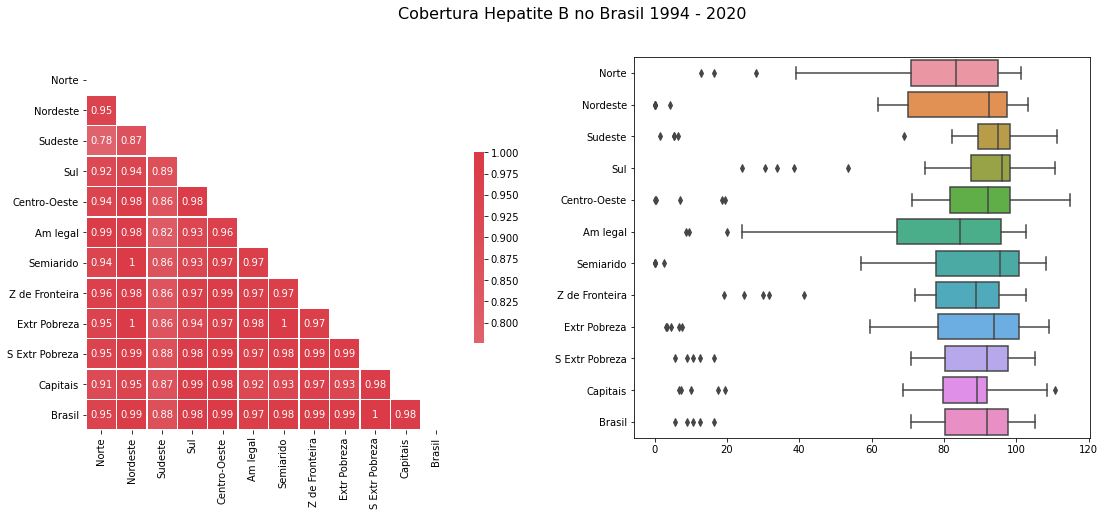

In [ ]:
df = hepb
#maxVal = 100
#df = df.where(df <= maxVal, maxVal)

# Generate a mask for the upper triangle
corr = df.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = df.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Hepatite B no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Hepatite B no Brasil 1994 - 2020.png', format='png')

In [ ]:
hepb.describe()

,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,S Extr Pobreza,Capitais,Brasil
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2007.000000,75.805926,74.781481,81.614815,84.830741,78.764444,74.517037,77.051481,79.170370,78.222222,78.012963,75.859630,78.012963
std,7.937254,25.788716,37.309980,33.477097,24.849642,35.116312,29.701060,38.611726,25.347492,37.056744,33.496918,31.982782,33.496918
min,1994.000000,12.820000,0.000000,1.620000,24.270000,0.000000,8.610000,0.000000,19.300000,3.080000,5.790000,6.660000,5.790000
25%,2000.500000,70.785000,70.080000,89.480000,87.440000,81.705000,66.975000,77.765000,77.925000,78.325000,80.205000,79.830000,80.205000
50%,2007.000000,83.230000,92.350000,95.020000,96.070000,92.150000,84.460000,95.420000,88.810000,93.960000,92.000000,89.280000,92.000000
75%,2013.500000,94.990000,97.575000,98.375000,98.290000,98.240000,95.790000,100.765000,95.270000,100.705000,97.725000,92.020000,97.725000
max,2020.000000,101.420000,103.250000,111.330000,110.790000,114.750000,102.660000,108.320000,102.570000,109.030000,105.190000,110.820000,105.190000


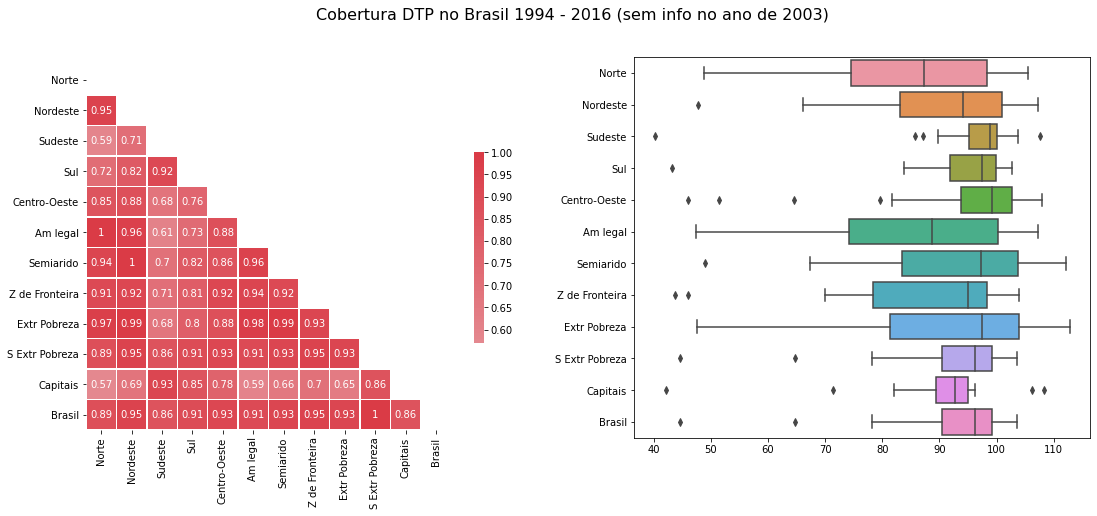

In [ ]:
# Generate a mask for the upper triangle
dtp_clean = dtp[dtp['Ano'] != 2003]
corr = dtp_clean.drop('Ano', axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);
#axs[0].set_title('Cobertura BCG no Brasil (ao longo dos anos)')

data = dtp_clean.drop('Ano', axis=1)
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura DTP no Brasil 1994 - 2016 (sem info no ano de 2003)', fontsize=16)
plt.savefig('output/Cobertura DTP no Brasil 1994 - 2016 (sem info no ano de 2003).png', format='png')

In [ ]:
dtp.describe()

,Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,S Extr Pobreza,Capitais,Brasil
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2005.00000,81.322609,85.710000,90.812174,89.617826,88.606522,82.000870,87.957391,83.116087,87.633043,87.417391,86.188261,87.417391
std,6.78233,23.650531,24.301504,23.432367,22.845665,25.576319,24.562324,24.960502,24.098934,25.591590,23.392430,22.485825,23.392430
min,1994.00000,2.050000,1.620000,1.260000,1.040000,0.920000,1.540000,1.950000,1.870000,1.810000,1.410000,1.030000,1.410000
25%,1999.50000,72.460000,75.740000,93.380000,91.445000,87.450000,71.905000,76.550000,76.285000,74.960000,85.035000,89.185000,85.035000
50%,2005.00000,86.620000,93.330000,98.650000,96.970000,98.960000,88.570000,97.200000,94.710000,96.960000,95.480000,92.660000,95.480000
75%,2010.50000,98.255000,100.735000,100.025000,99.855000,102.670000,100.045000,103.440000,98.155000,103.690000,98.810000,94.795000,98.810000
max,2016.00000,105.490000,107.330000,107.660000,102.700000,108.000000,107.310000,112.070000,103.960000,112.770000,103.500000,108.320000,103.500000


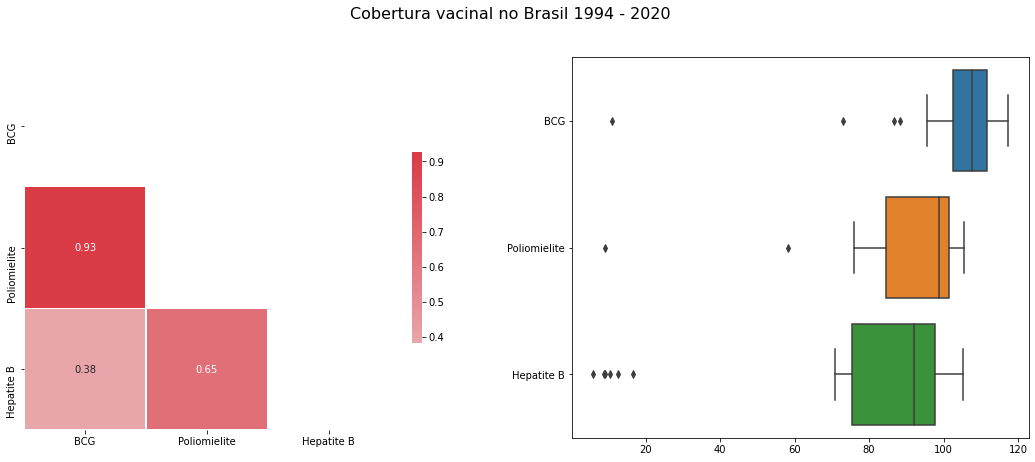

In [ ]:
# Generate a mask for the upper triangle
br['Ano'] = br['Ano'].astype(int)
corr = br[['BCG', 'Poliomielite', 'Hepatite B']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);

data = br.drop('Ano', axis=1)[['BCG', 'Poliomielite', 'Hepatite B']]
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura vacinal no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura vacinal no Brasil 1994 - 2020.png', format='png')

In [ ]:
br.describe()

,Ano,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1° ref),Meningococo C (1° ref),Poliomielite(1° ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1° ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2007.500000,102.105714,20.597857,45.359643,34.477500,75.554286,26.098929,33.499286,91.074286,9.336429,38.104643,19.947143,24.101786,24.691786,22.669286,313.405714,22.129643,14.478214,71.807143,9.515714,21.918929,30.396071,8.129286,11.373571,10.792857,47.192857,64.330357,70.370000
std,8.225975,20.372953,36.617016,43.132749,44.903324,35.351788,39.867609,43.542251,19.576922,23.309157,17.396299,34.957293,38.331733,39.248010,36.190541,1250.790542,35.381394,26.963447,40.103797,23.373458,35.211445,45.168634,24.406934,18.927646,20.624790,48.722644,48.039767,17.495453
min,1994.000000,10.970000,0.000000,0.000000,0.000000,5.790000,0.000000,0.000000,9.080000,0.000000,4.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000
25%,2000.750000,102.652500,0.000000,0.000000,0.000000,75.375000,0.000000,0.000000,84.662500,0.000000,33.275000,0.000000,0.000000,0.000000,0.000000,78.970000,0.000000,0.000000,59.742500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.817500,70.225000
50%,2007.500000,107.680000,0.000000,61.750000,0.000000,91.940000,0.000000,0.000000,98.685000,0.000000,45.380000,0.000000,0.000000,0.000000,0.000000,96.495000,0.000000,0.000000,94.135000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.535000,72.995000,75.375000
75%,2014.250000,111.642500,15.667500,86.085000,87.702500,97.717500,72.297500,88.560000,101.357500,0.000000,49.235000,21.182500,72.485000,76.400000,69.387500,105.650000,64.257500,23.810000,97.987500,0.000000,58.880000,82.015000,0.015000,24.675000,4.435000,97.772500,82.087500,77.177500
max,2021.000000,117.280000,90.930000,95.350000,105.660000,105.190000,96.300000,95.250000,105.430000,68.450000,62.410000,97.070000,93.110000,93.860000,92.920000,6692.100000,92.880000,90.190000,103.500000,72.960000,90.960000,108.610000,93.100000,50.730000,63.230000,103.310000,196.580000,95.070000


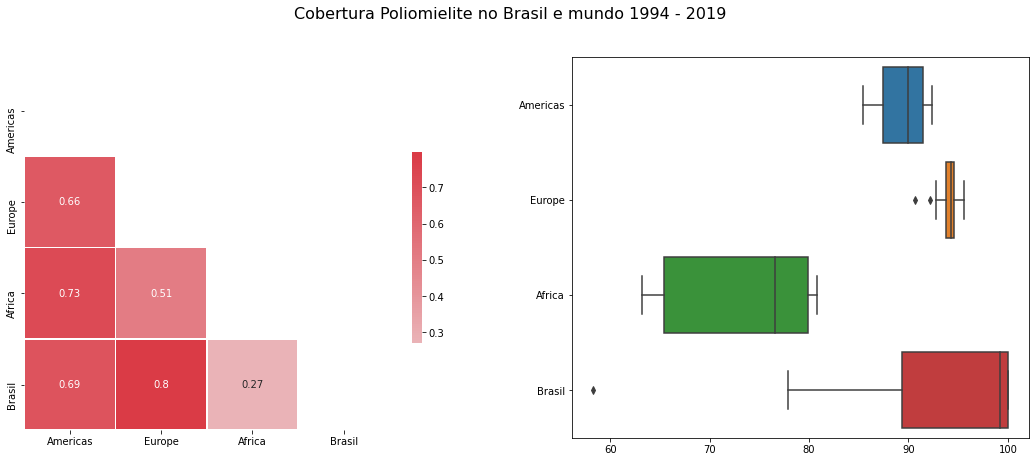

In [ ]:
# Generate a mask for the upper triangle
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
df = polio_mundo_br
maxVal = 100
df = df.where(df <= maxVal, maxVal)
corr = df[['Americas','Europe','Africa', 'Brasil']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0]);

data = df[['Americas','Europe','Africa', 'Brasil']]
sns.boxplot(data=data, orient='h', ax=axs[1]);
f.suptitle('Cobertura Poliomielite no Brasil e mundo 1994 - 2019', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil e mundo 1994 - 2019.png', format='png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


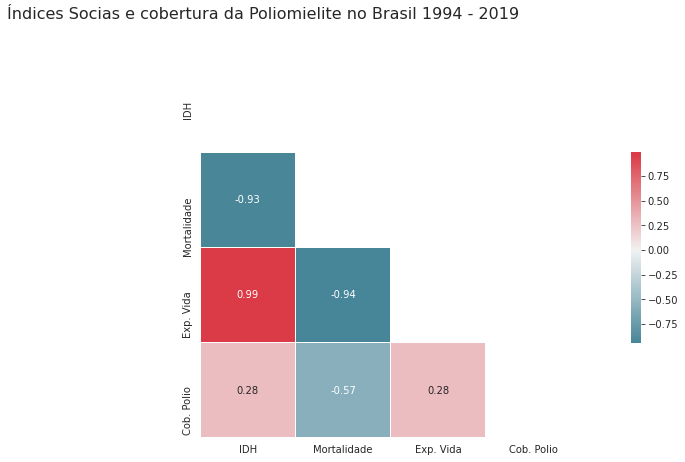

In [ ]:
# Generate a mask for the upper triangle
df = brasil_indices[['Ano','idh','Mortalidade','exp_vida_anos','polio']]
df['polio'] = df['polio'].where(df['polio'] <= maxVal, maxVal)
d = {'idh': 'IDH', 'exp_vida_anos': 'Exp. Vida', 'polio':'Cob. Polio'}
df = df.rename(columns=d)
corr = df.drop('Ano', axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(18, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});
f.suptitle('Índices Socias e cobertura da Poliomielite no Brasil 1994 - 2019', fontsize=16)
plt.savefig('output/Índices Socias e cobertura da Poliomielite no Brasil 1994 - 2019.png', format='png')

# Gráficos Temporais

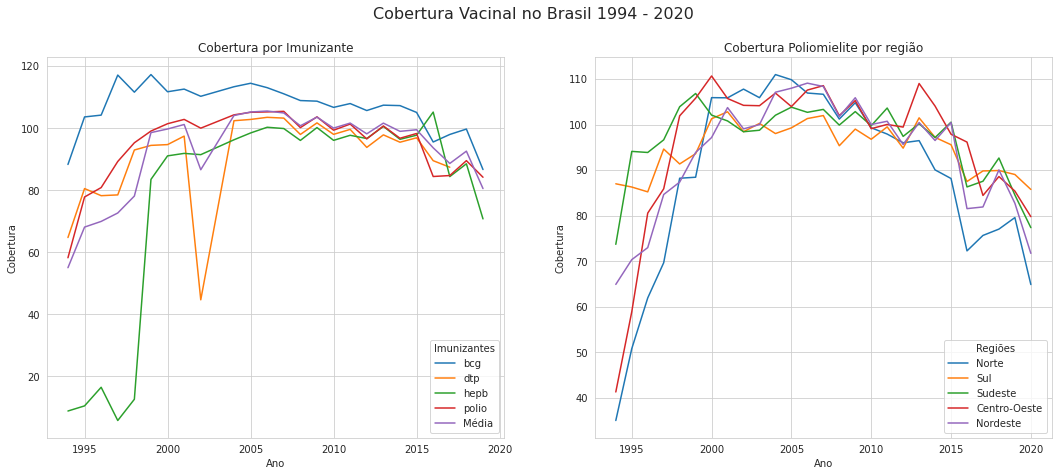

In [ ]:
sns.set_style(style='whitegrid')
df = brasil_indices[['Ano','bcg','dtp','hepb','polio','Média']][brasil_indices['Ano'] != 2003]
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df = df.melt('Ano', var_name='Imunizantes',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Imunizantes', data=df, ax = axs[0])
df2 = polio[['Ano','Norte','Sul','Sudeste','Centro-Oeste','Nordeste']]
df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
axs[0].set_title('Cobertura por Imunizante')
axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Vacinal no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Vacinal no Brasil 1994 - 2020.png', format='png')

In [ ]:
df = brasil_indices[['Ano','bcg','dtp','hepb','polio']]
df[df['Ano'] == 2002]['dtp']

8    44.69
Name: dtp, dtype: float64

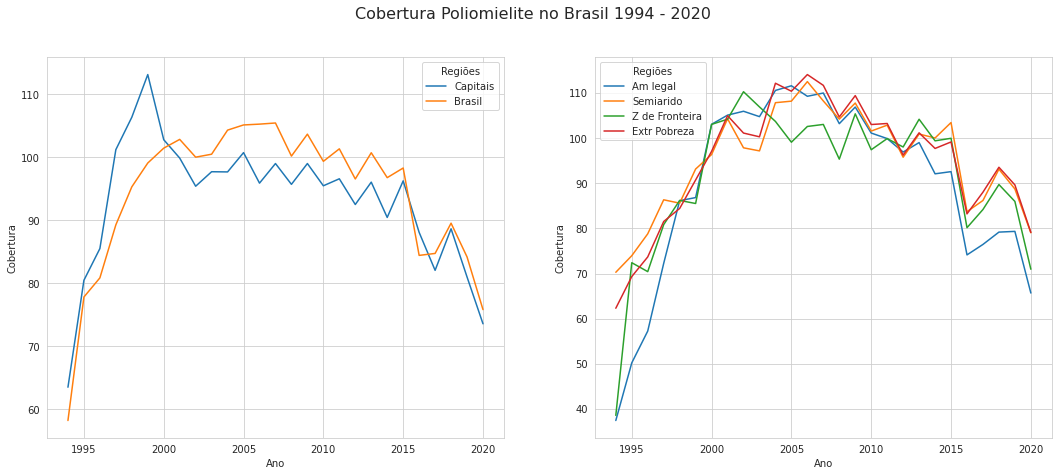

In [ ]:
sns.set_style(style='whitegrid')
df = polio[['Ano','Capitais','Brasil']]
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df = df.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df, ax = axs[0])

df2 = polio[['Ano','Am legal','Semiarido','Z de Fronteira','Extr Pobreza']]
df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
#axs[0].set_title('Cobertura por Imunizante')
#axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil 1994 - 2020.png', format='png')

In [ ]:
sns.set_style(style='whitegrid')
df = brasil_indices[['Ano','Média/Ano']]
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(18, 7))

sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df)

df2 = polio[['Ano','Am legal','Semiarido','Z de Fronteira','Extr Pobreza']]
df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
#axs[0].set_title('Cobertura por Imunizante')
#axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil 1994 - 2020.png', format='png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


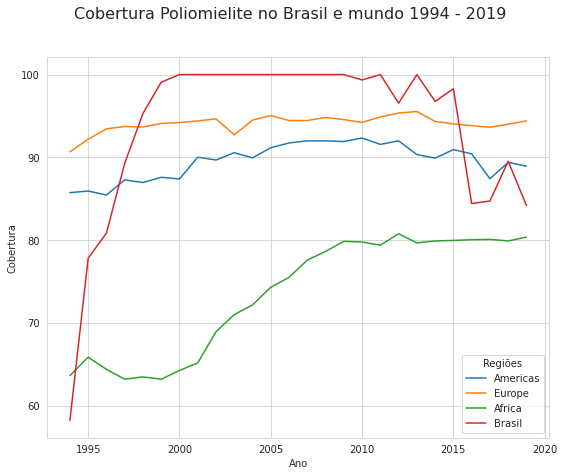

In [ ]:
polio_mundo_br = pd.read_csv("/content/E1--Vaccine-immunology/data/processed/vaccine-immunology/polio_mundo_br.csv")
df = polio_mundo_br[['Ano','Americas','Europe','Africa','Brasil']]
df['Brasil'] = df['Brasil'].where(df['Brasil'] <= maxVal, maxVal)

sns.set_style(style='whitegrid')

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(9, 7))

df = df.melt('Ano', var_name='Regiões',  value_name='Cobertura')
sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df)

#df2 = polio[['Ano','Am legal','Semiarido','Z de Fronteira','Extr Pobreza']]
#df2 = df2.melt('Ano', var_name='Regiões',  value_name='Cobertura')
#sns.lineplot(x="Ano", y='Cobertura', hue='Regiões', data=df2, ax = axs[1])
#axs[0].set_title('Cobertura por Imunizante')
#axs[1].set_title('Cobertura Poliomielite por região')

f.suptitle('Cobertura Poliomielite no Brasil e mundo 1994 - 2019', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil e mundo 1994 - 2020.png', format='png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


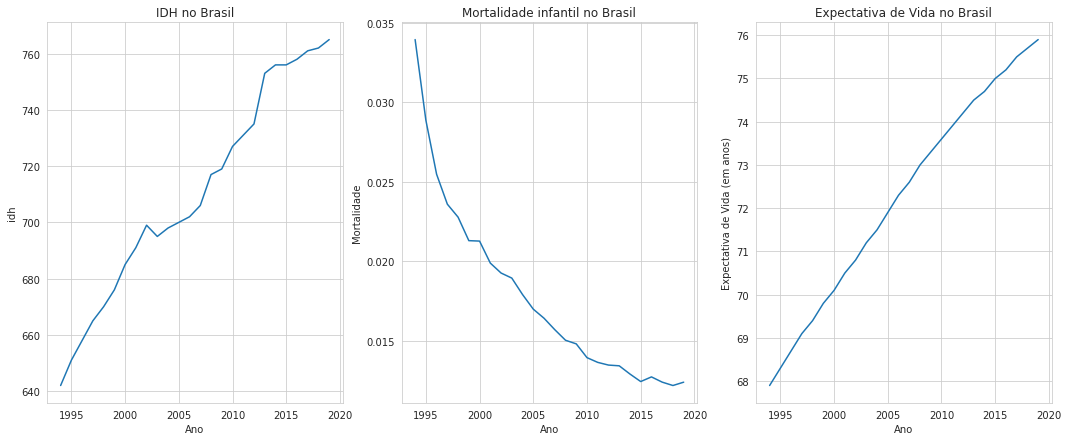

In [ ]:
maxVal = 100.0
df = brasil_indices[['Ano','ed_ind','idh','Mortalidade','exp_vida_anos','polio']]
df['polio'] = df['polio'].where(df['polio'] <= maxVal, maxVal)

sns.set_style(style='whitegrid')

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=3,figsize=(18, 7))

df1 = df[['Ano','idh']]
sns.lineplot(x="Ano", y='idh', data=df1, ax=axs[0])

df2 = df[['Ano','Mortalidade']]
sns.lineplot(x="Ano", y='Mortalidade', data=df2, ax=axs[1])

df3 = df[['Ano','exp_vida_anos']]
sns.lineplot(x="Ano", y='exp_vida_anos', data=df3, ax=axs[2])


axs[0].set_title('IDH no Brasil')
axs[1].set_ylabel('IDH')
axs[1].set_title('Mortalidade infantil no Brasil')
axs[1].set_ylabel('Mortalidade')
axs[2].set_title('Expectativa de Vida no Brasil')
axs[2].set_ylabel('Expectativa de Vida (em anos)')

#f.suptitle('Índices', fontsize=16)

plt.savefig('output/Número de óbitos infantis no Brasil.png', format='png')

# Gráficos Scatter / Ajuste Linear

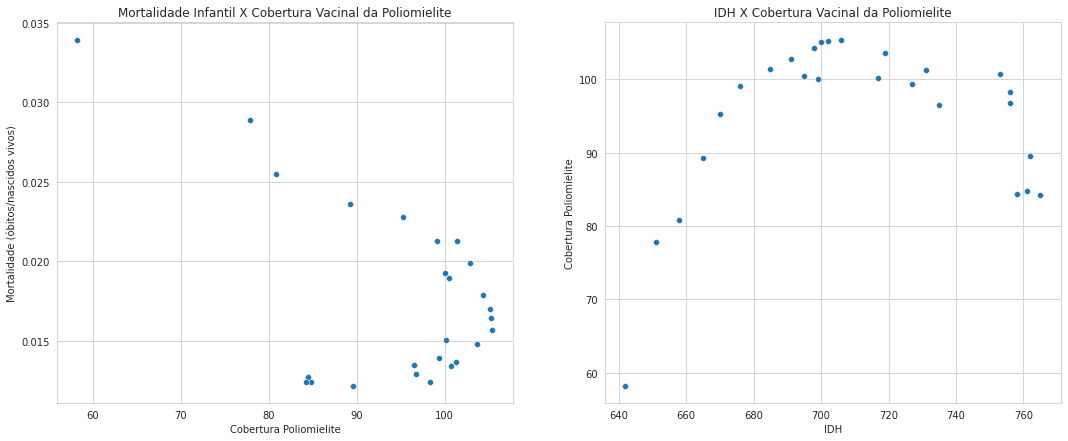

In [ ]:
maxVal = 100.0
df = brasil_indices[['Ano','ed_ind','idh','Mortalidade','exp_vida_anos','polio']]
#df['polio'] = df['polio'].where(df['polio'] <= maxVal, maxVal)

sns.set_style(style='whitegrid')

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

sns.scatterplot(x="polio", y='Mortalidade', data=df, ax=axs[0])

sns.scatterplot(x="idh", y='polio', data=df, ax=axs[1])


axs[0].set_title('Mortalidade Infantil X Cobertura Vacinal da Poliomielite')
axs[0].set_ylabel('Mortalidade (óbitos/nascidos vivos)')
axs[0].set_xlabel('Cobertura Poliomielite')
axs[1].set_title('IDH X Cobertura Vacinal da Poliomielite')
axs[1].set_xlabel('IDH')
axs[1].set_ylabel('Cobertura Poliomielite')

#f.suptitle('Índices', fontsize=16)

plt.savefig('output/Cobertura Poliomielite.png', format='png')

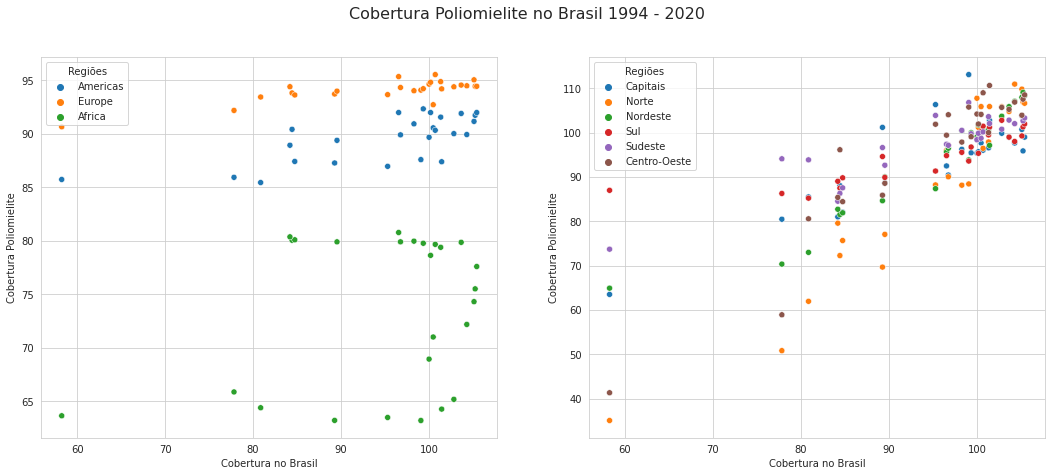

In [ ]:
sns.set_style(style='whitegrid')
df = polio_mundo_br.drop('Ano', axis=1)
maxVal = 100.0
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))

df1 = df[['Brasil','Americas','Europe','Africa']]
df1 = df1.melt('Brasil', var_name='Regiões',  value_name='Cobertura Poliomielite')
sns.scatterplot(x='Brasil', y='Cobertura Poliomielite', hue='Regiões',data=df1, ax = axs[0])

df2 = df[['Brasil','Capitais','Norte','Nordeste','Sul','Sudeste','Centro-Oeste']]
#df2 = df[['Brasil','Capitais','1 Região Norte','2 Região Nordeste','3 Região Sudeste','4 Região Sul','5 Região Centro-Oeste']]
df2 = df2.melt('Brasil', var_name='Regiões',  value_name='Cobertura Poliomielite')
sns.scatterplot(x="Brasil", y='Cobertura Poliomielite', hue='Regiões', data=df2, ax = axs[1])
axs[0].set_xlabel('Cobertura no Brasil')
axs[1].set_xlabel('Cobertura no Brasil')

f.suptitle('Cobertura Poliomielite no Brasil 1994 - 2020', fontsize=16)
plt.savefig('output/Cobertura Poliomielite no Brasil 1994 - 2020.png', format='png')

Text(0.5, 0.98, 'Cobertura Poliomielite 1994 - 2019')

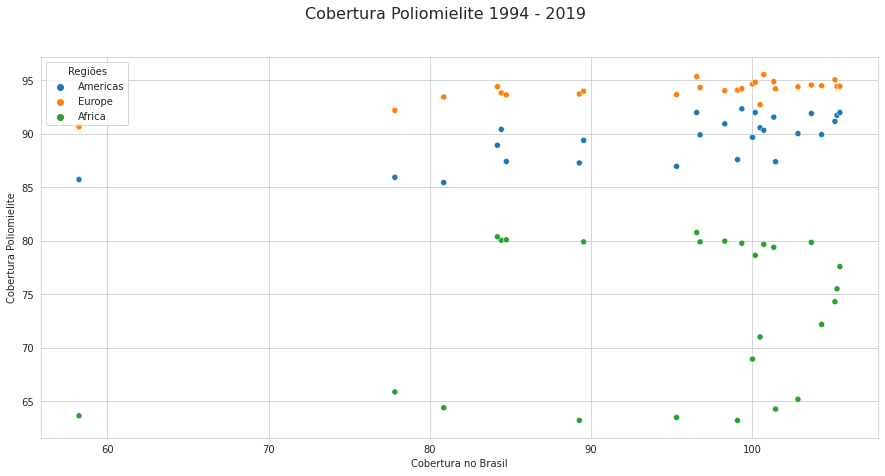

In [ ]:
sns.set_style(style='whitegrid')
df = polio_mundo_br.drop('Ano', axis=1)
maxVal = 100.0
#df = df.where(df <= maxVal, maxVal)

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(15, 7))

df1 = df[['Brasil','Americas','Europe','Africa']]
df1 = df1.melt('Brasil', var_name='Regiões',  value_name='Cobertura Poliomielite')
sns.scatterplot(x='Brasil', y='Cobertura Poliomielite', hue='Regiões',data=df1)

axs.set_xlabel('Cobertura no Brasil')

f.suptitle('Cobertura Poliomielite 1994 - 2019', fontsize=16)

In [ ]:
df = polio_mundo_br.drop('Ano',axis=1)
maxVal = 100.0
df = df.where(df <= maxVal, maxVal)

df.describe()

,Period,Americas,Europe,Africa,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
count,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,100.0,89.568132,94.075243,73.521011,87.180000,92.259231,96.183077,94.932692,92.988846,87.693846,93.359231,90.905385,92.573462,92.955385,93.631923
std,0.0,2.165003,1.005309,7.053789,17.406732,10.615760,6.479138,5.014830,14.190035,17.458234,8.882898,14.139172,10.741370,8.633596,10.091303
min,100.0,85.457143,90.666667,63.217391,35.070000,64.930000,73.720000,85.230000,41.330000,37.450000,70.300000,38.580000,62.330000,63.520000,58.240000
25%,100.0,87.471429,93.755624,65.368330,77.692500,85.330000,94.742500,90.270000,90.480000,79.240000,86.960000,85.655000,88.452500,89.100000,89.337500
50%,100.0,89.985714,94.283019,76.565217,96.235000,98.100000,99.815000,96.170000,100.000000,97.990000,97.540000,98.590000,98.460000,95.970000,99.215000
75%,100.0,91.471429,94.549528,79.903562,100.000000,100.000000,100.000000,99.435000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000
max,100.0,92.342857,95.547170,80.787234,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
hepb_mundo_br.head()

,Period,Ano,Americas,Europe,Africa,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Am legal,Semiarido,Z de Fronteira,Extr Pobreza,Capitais,Brasil
0,1994,1994.0,48.000000,63.333333,57.000000,16.32,0.01,90.42,38.45,0.00,9.64,0.00,24.85,3.08,7.24,8.85
1,1995,1995.0,62.000000,58.363636,65.000000,39.16,0.00,5.36,30.66,0.31,24.26,0.00,29.93,4.41,9.95,10.50
2,1996,1996.0,72.750000,76.000000,66.600000,47.33,0.04,5.39,53.60,19.48,30.03,0.01,41.36,7.63,19.51,16.50
3,1997,1997.0,69.800000,75875.000000,72.428571,12.82,0.14,1.62,24.27,6.90,8.61,0.03,19.30,3.46,6.66,5.79
4,1998,1998.0,74.285714,74.050000,76.000000,28.07,4.27,6.60,33.72,18.75,20.08,2.63,31.74,6.73,17.44,12.63


In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices['polio'])
x = x.reshape(-1,1)
y = np.array(brasil_indices['Mortalidade'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.29603234688075797
Coeficiente Angular: [-0.00027884]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices['polio'][brasil_indices['Ano'] <= 2014])
x2 = x2.reshape(-1,1)
y2 = np.array(brasil_indices['Mortalidade'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.6942996200970403
Coeficiente Angular: [-0.0004055]


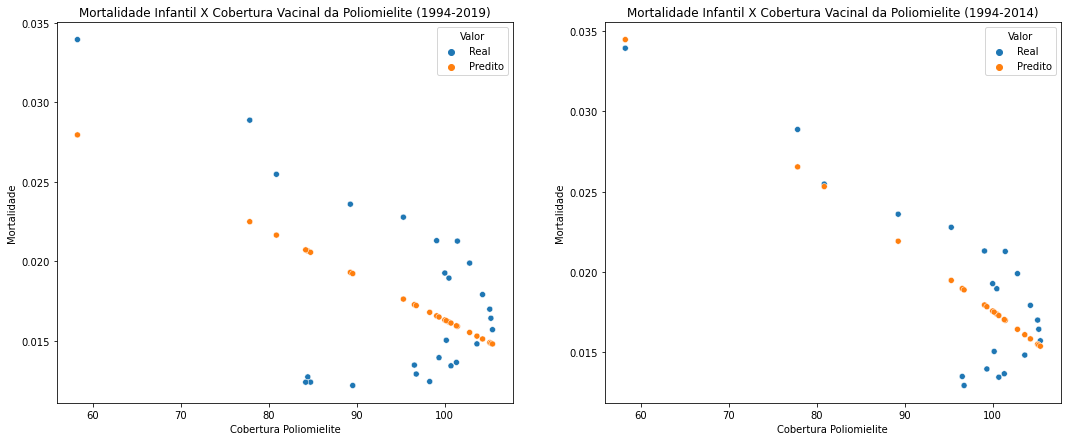

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('Mortalidade Infantil X Cobertura Vacinal da Poliomielite (1994-2019)')
axs[0].set_ylabel('Mortalidade')
axs[0].set_xlabel('Cobertura Poliomielite')
axs[1].set_title('Mortalidade Infantil X Cobertura Vacinal da Poliomielite (1994-2014)')
axs[1].set_ylabel('Mortalidade')
axs[1].set_xlabel('Cobertura Poliomielite')
plt.savefig('output/Mortalidade Infantil X Cobertura Vacinal da Poliomielite.png', format='png')

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices['bcg'])
x = x.reshape(-1,1)
y = np.array(brasil_indices['Mortalidade'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.0005696254692096892
Coeficiente Angular: [1.73558521e-05]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices['bcg'][brasil_indices['Ano'] <= 2014])
x2 = x2.reshape(-1,1)
y2 = np.array(brasil_indices['Mortalidade'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.1898336499353036
Coeficiente Angular: [-0.00039963]


Text(0.5, 0, 'Cobertura BCG')

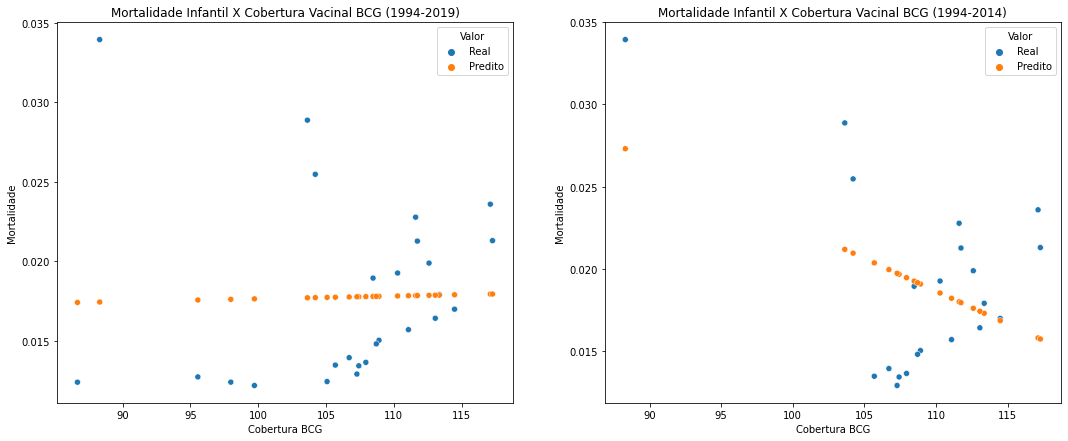

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('Mortalidade Infantil X Cobertura Vacinal BCG (1994-2019)')
axs[0].set_ylabel('Mortalidade')
axs[0].set_xlabel('Cobertura BCG')
axs[1].set_title('Mortalidade Infantil X Cobertura Vacinal BCG (1994-2014)')
axs[1].set_ylabel('Mortalidade')
axs[1].set_xlabel('Cobertura BCG')

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices[['hepb']])
#x = x.reshape(-1,1)
y = np.array(brasil_indices['Mortalidade'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.6487407719521694
Coeficiente Angular: [-0.00013301]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices[['hepb']][brasil_indices['Ano'] <= 2014])
#x = x.reshape(-1,1)
y2 = np.array(brasil_indices['Mortalidade'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.7198326798099903
Coeficiente Angular: [-0.00012688]


Text(0.5, 0, 'Cobertura Hepatite B')

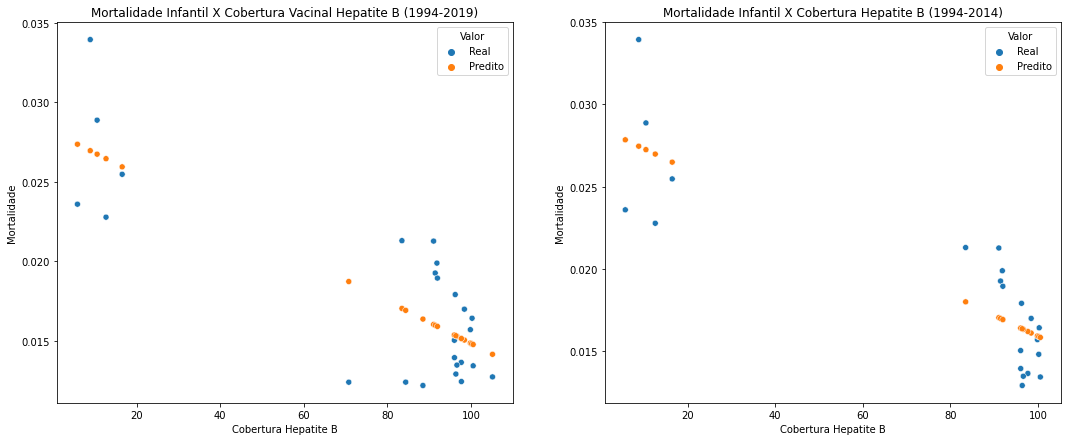

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Mortalidade')
sns.scatterplot(x='x', y='Mortalidade', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('Mortalidade Infantil X Cobertura Vacinal Hepatite B (1994-2019)')
axs[0].set_ylabel('Mortalidade')
axs[0].set_xlabel('Cobertura Hepatite B')
axs[1].set_title('Mortalidade Infantil X Cobertura Hepatite B (1994-2014)')
axs[1].set_ylabel('Mortalidade')
axs[1].set_xlabel('Cobertura Hepatite B')

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices[['idh']])
#x = x.reshape(-1,1)
y = np.array(brasil_indices['polio'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.05839671706344041
Coeficiente Angular: [0.07065153]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices[['idh']][brasil_indices['Ano'] <= 2014])
#x = x.reshape(-1,1)
y2 = np.array(brasil_indices['polio'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.3994102651847662
Coeficiente Angular: [0.22802816]


Text(0.5, 0, 'IDH')

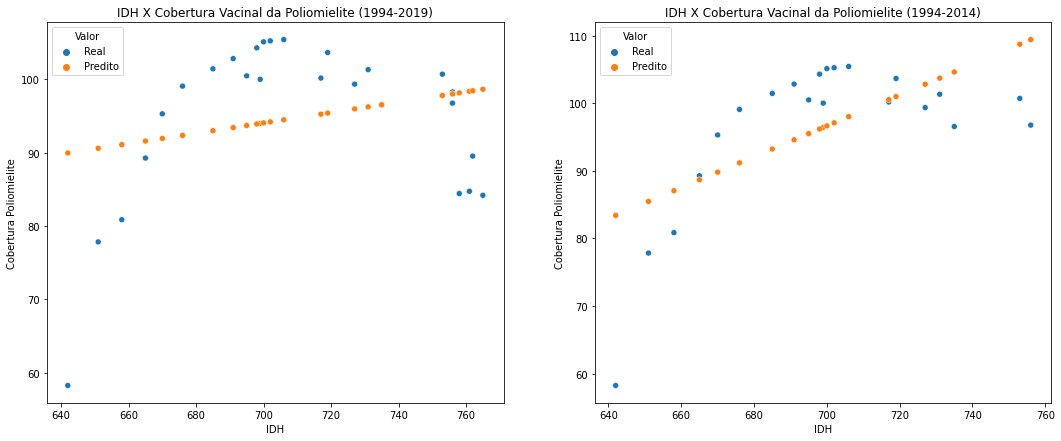

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('IDH X Cobertura Vacinal da Poliomielite (1994-2019)')
axs[0].set_ylabel('Cobertura Poliomielite')
axs[0].set_xlabel('IDH')
axs[1].set_title('IDH X Cobertura Vacinal da Poliomielite (1994-2014)')
axs[1].set_ylabel('Cobertura Poliomielite')
axs[1].set_xlabel('IDH')

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices[['idh']])
#x = x.reshape(-1,1)
y = np.array(brasil_indices['bcg'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.10999545334820093
Coeficiente Angular: [-0.0683366]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices[['idh']][brasil_indices['Ano'] <= 2014])
#x = x.reshape(-1,1)
y2 = np.array(brasil_indices['bcg'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.028237100475085094
Coeficiente Angular: [0.03216939]


Text(0.5, 0, 'IDH')

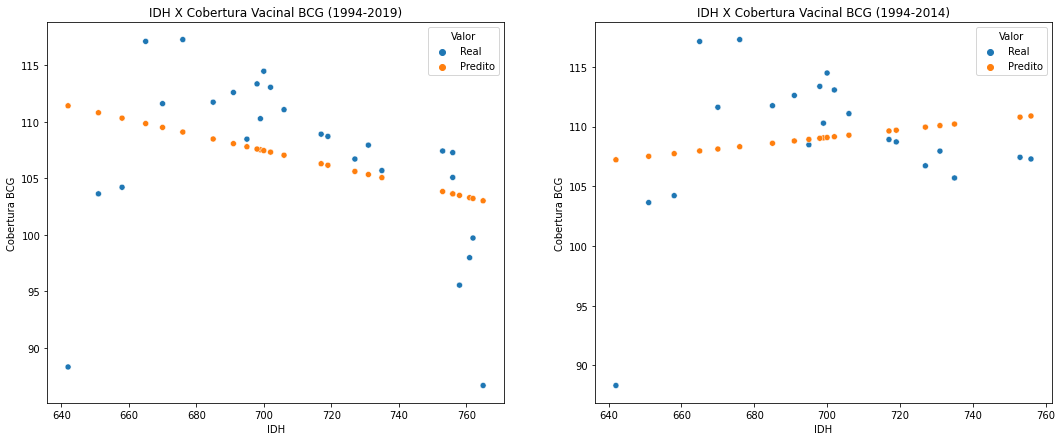

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('IDH X Cobertura Vacinal BCG (1994-2019)')
axs[0].set_ylabel('Cobertura BCG')
axs[0].set_xlabel('IDH')
axs[1].set_title('IDH X Cobertura Vacinal BCG (1994-2014)')
axs[1].set_ylabel('Cobertura BCG')
axs[1].set_xlabel('IDH')

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array(brasil_indices[['idh']])
#x = x.reshape(-1,1)
y = np.array(brasil_indices['hepb'])

lr = LinearRegression()
lr.fit(x,y)
print('R^2:', lr.score(x,y))
print('Coeficiente Angular:', lr.coef_)

R^2: 0.46575079170526323
Coeficiente Angular: [0.61922952]


In [ ]:
from sklearn.linear_model import LinearRegression
x2 = np.array(brasil_indices[['idh']][brasil_indices['Ano'] <= 2014])
#x = x.reshape(-1,1)
y2 = np.array(brasil_indices['hepb'][brasil_indices['Ano'] <= 2014])

lr2 = LinearRegression()
lr2.fit(x2,y2)
print('R^2:', lr2.score(x2,y2))
print('Coeficiente Angular:', lr2.coef_)

R^2: 0.6244084178651204
Coeficiente Angular: [0.92779349]


Text(0.5, 0, 'IDH')

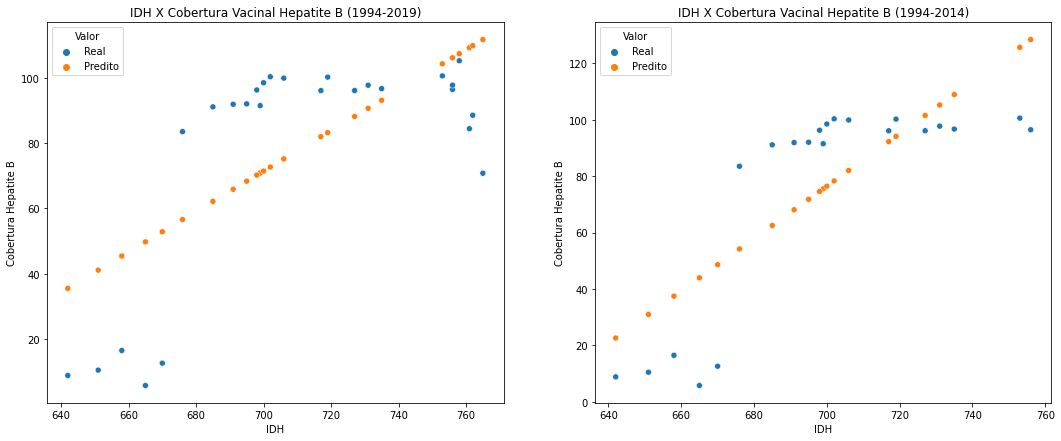

In [ ]:
Y = lr.predict(x)
df = pd.DataFrame()
df['Real'] = y
df['Predito'] = Y
df['x'] = x

Y2 = lr2.predict(x2)
df2 = pd.DataFrame()
df2['Real'] = y2
df2['Predito'] = Y2
df2['x'] = x2

# Set up the matplotlib figure
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(18, 7))
df = df.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df, ax=axs[0])

df2 = df2.melt('x', var_name='Valor',  value_name='Cobertura')
sns.scatterplot(x='x', y='Cobertura', hue='Valor', data=df2, ax=axs[1])

axs[0].set_title('IDH X Cobertura Vacinal Hepatite B (1994-2019)')
axs[0].set_ylabel('Cobertura Hepatite B')
axs[0].set_xlabel('IDH')
axs[1].set_title('IDH X Cobertura Vacinal Hepatite B (1994-2014)')
axs[1].set_ylabel('Cobertura Hepatite B')
axs[1].set_xlabel('IDH')

# Teste de Hipóteses

A região geográfica influencia na cobertura vacinal da poliomielite no Brasil?

In [ ]:
#(F, p) = scipy.stats.f_oneway(polio_mundo_br['Nordeste'], polio_mundo_br['Norte']) # Testa se as amostras female_zumbi['height'] e male_zumbi['height'] correspondem à mesma população
(F, p) = scipy.stats.f_oneway(polio_mundo_br['2 Região Nordeste'], polio_mundo_br['1 Região Norte'])
print('Valor p = ', p)

Sul - Sudeste: 0.23805499904407643

Sul - Centro-Oeste: 0.8178347725642913

Sul - Norte: 0.1682715439643013

Sul - Nordeste: 0.6300880261585863

Sudeste - Centro-Oeste: 0.6914481755918682

Sudeste - Norte: 0.06585135182843804

Sudeste - Nordeste: 0.22847489761487477

Centro-Oeste - Norte: 0.20759061574864146

Centro-Oeste - Nordeste: 0.6082722854909025

Norte - Nordeste: 0.3475133013746581



A evolução da cobertura vacinal da poliomielite no Brasil é distinta para as regiões de extrema pobreza?

In [ ]:
df = dtp[dtp['Ano'] != 2003]
df = df[df['Ano'] != 2018]
df = df[df['Ano'] != 2019]

(F, p) = scipy.stats.f_oneway(df['Extr Pobreza'], df['Capitais'])
print('Valor p = ', p)

Valor p =  0.7557168346688834


Polio p = 0.5911813845571416

BCG p =  2.8589832404604153e-08

Hepatite B p =  0.8029612574563746

Febre Amarela p =  0.05994138514179503

DTP p = 0.7557168346688834

A evolução da cobertura vacinal da poliomielite no Brasil é distinta da cobertura em demais continentes?

In [ ]:
maxVal = 100.0
df = polio_mundo_br
df = df.where(df <= maxVal, maxVal)

(F, p) = scipy.stats.f_oneway(df['Americas'], df['Africa']) 
print('Valor p = ', p)

Valor p =  4.421495897713555e-15


Brasil - Africa: 5.1793722444961777e-11

Brasil - Europe: 0.8245204932768719

Brasil - Americas: 0.05009419680079164

Europa - Americas: 5.670108371616639e-13

Europa - Africa: 8.523509560266049e-20

Americas - Africa: 4.421495897713555e-15